# 使用Python建立ARIMA模型，預測股票價格，並進行可視化

In [ ]:
pip install yfinance statsmodels matplotlib pandas pmdarima


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.5 MB/s eta 0:00:00


請輸入股票代號: 2330


[*********************100%***********************]  1 of 1 completed


        Date   Open   High    Low  Close   Adj Close    Volume
0 2024-04-26  788.0  789.0  782.0  782.0  775.530823  32571247
1 2024-04-29  790.0  795.0  787.0  795.0  788.423279  26765837
2 2024-04-30  797.0  802.0  790.0  790.0  783.464661  39051972


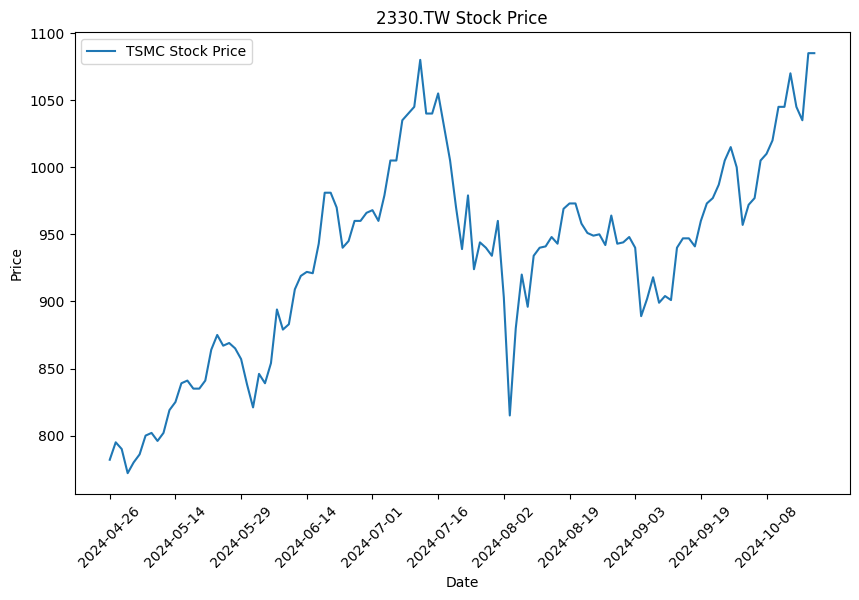

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import datetime as dt

# 輸入股票代號
stock_id = input("請輸入股票代號: ")+ ".TW"
'''今天往前算幾天'''
# 計算起始日期和結束日期（今天的日期和6個月前的日期）
end_date = dt.date.today()
start_date = end_date - dt.timedelta(days=180)

data = yf.download(stock_id, start=start_date, end=end_date).reset_index()

print(data.head(3))

close_price = data['Close']  # 只使用收盤價數據

train_size = int(len(close_price)*0.7)
train, test = close_price[:train_size], close_price[train_size:]


# 畫出台積電的股票收盤價圖表
plt.figure(figsize=(10, 6))
plt.plot(close_price, label='TSMC Stock Price')
num=10
date = data["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性
plt.title(f'{stock_id} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(close_price)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.770175
p-value: 0.395366


In [ ]:
from pmdarima import auto_arima
# 使用 auto_arima 函数自动选择最佳 ARIMA 模型参数
model = auto_arima(close_price, seasonal=False, stepwise=True, suppress_warnings=True, error_action="ignore")

# 打印最佳模型参数
print(model.order)

# 使用最佳模型参数拟合 ARIMA 模型
best_model = ARIMA(close_price, order=model.order).fit()

# 使用拟合好的模型进行预测
best_cfg = best_model.predict(len(test))

(2, 1, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [ ]:
import math
from sklearn.metrics import mean_squared_error
yhat = best_model.predict(start=len(test),end=len(close_price)-1)
# 檢查 yhat 和 test 的長度
print(f"Length of test: {len(test)}")
print(f"Length of yhat: {len(yhat)}")

yhat_test = yhat[:len(test)]

# 檢查預測結果和測試數據的索引
print(f"Test index: {test.index}")
print(f"yhat index: {yhat.index}")

rmse = math.sqrt(mean_squared_error(test, yhat_test))
print('Test RMSE: %.3f' % rmse)


Length of test: 36
Length of yhat: 83
Test index: RangeIndex(start=83, stop=119, step=1)
yhat index: RangeIndex(start=36, stop=119, step=1)
Test RMSE: 88.391


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Tomorrow's predicted stock price: 1073.79


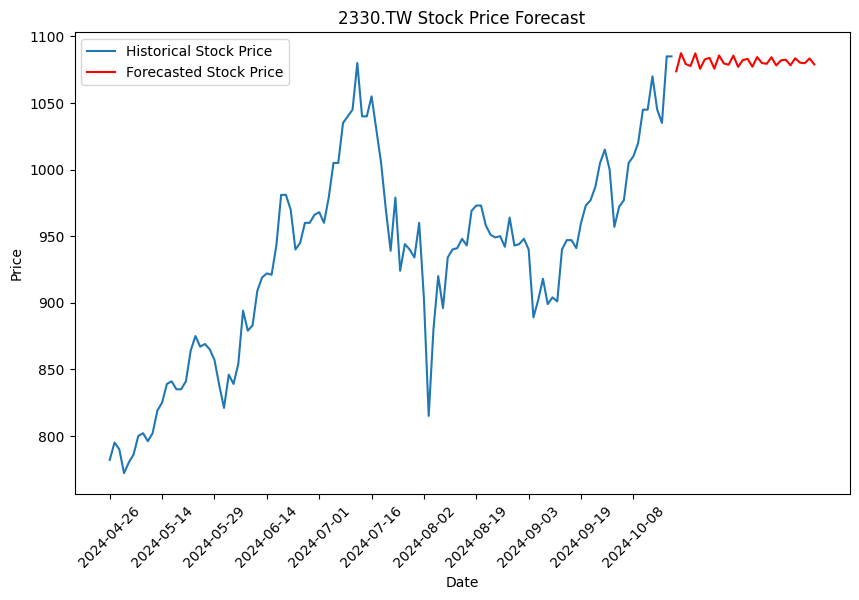

In [ ]:
# 建立ARIMA模型 (p=1, d=1, q=1)
model = ARIMA(close_price, order=model.order)
model_fit = model.fit()

# 預測未來30天的股票價格
forecast = model_fit.forecast(steps=30)

# 列印明天的股票價格 (第一個預測值)
print(f"Tomorrow's predicted stock price: {forecast.values[0]:.2f}")
# 畫出預測結果
plt.figure(figsize=(10, 6))
plt.plot(close_price, label='Historical Stock Price')

num = 10
date = data["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

plt.plot(forecast.index, forecast, label='Forecasted Stock Price', color='red')
plt.title(f'{stock_id} Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

 # 使用Python設計一個量化交易策略，並使用歷史資料進行回測

In [2]:
pip install yfinance backtrader matplotlib pandas backtrader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.5/419.5 kB 3.8 MB/s eta 0:00:00


請輸入股票代號: 2330


[*********************100%***********************]  1 of 1 completed


                                    Date   Open   High    Low  Close  \
1970-01-01 00:00:00.000000000 2024-04-26  788.0  789.0  782.0  782.0   
1970-01-01 00:00:00.000000001 2024-04-29  790.0  795.0  787.0  795.0   
1970-01-01 00:00:00.000000002 2024-04-30  797.0  802.0  790.0  790.0   

                                Adj Close    Volume  
1970-01-01 00:00:00.000000000  775.530823  32571247  
1970-01-01 00:00:00.000000001  788.423279  26765837  
1970-01-01 00:00:00.000000002  783.464661  39051972  


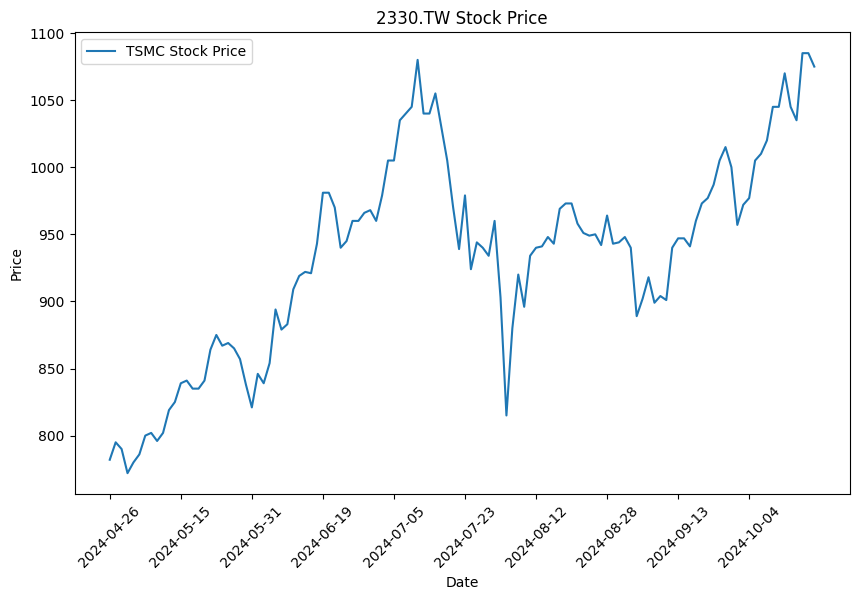

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import datetime as dt

# 輸入股票代號
stock_id = input("請輸入股票代號: ")+ ".TW"
'''今天往前算幾天'''
# 計算起始日期和結束日期（今天的日期和6個月前的日期）
end_date = dt.date.today()
start_date = end_date - dt.timedelta(days=180)

data = yf.download(stock_id, start=start_date, end=end_date).reset_index()
# 確保日期索引為 datetime 格式
data.index = pd.to_datetime(data.index)

print(data.head(3))

close_price = data['Close']  # 只使用收盤價數據
# 畫出台積電的股票收盤價圖表
plt.figure(figsize=(10, 6))
plt.plot(close_price, label='TSMC Stock Price')
num=10
date = data["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性
plt.title(f'{stock_id} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [10]:
import backtrader as bt
import datetime

# 定義交易策略
class SmaCross(bt.Strategy):
    params = (('short_period', 20), ('long_period', 50))

    def __init__(self):
        # 定義短期和長期均線
        self.sma_short = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.short_period)
        self.sma_long = bt.indicators.SimpleMovingAverage(self.data.close, period=self.params.long_period)

    def next(self):
        # 如果短期均線上穿長期均線，買入
        if self.sma_short > self.sma_long and not self.position:
            self.buy()
        # 如果短期均線下穿長期均線，賣出
        elif self.sma_short < self.sma_long and self.position:
            self.sell()

# 初始化回測環境
cerebro = bt.Cerebro()

# 加入歷史資料
stock_id = '2330.TW'
start_date = dt.date.today() - dt.timedelta(days=180)  # 6 個月前
end_date = dt.date.today()
data = bt.feeds.PandasData(dataname=data)
cerebro.adddata(data)

# 加入策略
cerebro.addstrategy(SmaCross)

# 設置初始資金
cerebro.broker.set_cash(1000000)  # 100萬資金

# 設定佣金
cerebro.broker.setcommission(commission=0.001)  # 設定交易費用

# 執行回測
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.run()
print('Ending Portfolio Value: %.2f' % cerebro.broker.getvalue())

# 繪製結果
#cerebro.plot()

AttributeError: 'Lines_LineSeries_DataSeries_OHLC_OHLCDateTime_Abst' object has no attribute 'columns'